# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

,RetailSales,RetailTransfers,WarehouseSales
ItemType,,,
BEER,209763.11,234924.44,2437617.32
DUNNAGE,0.00,0.00,-45331.00
KEGS,0.00,0.00,43558.00
LIQUOR,309847.85,334176.41,33173.32
NON-ALCOHOL,8109.97,9058.37,8656.72
REF,281.34,171.92,-6754.00
STR_SUPPLIES,995.98,3594.70,0.00
WINE,313400.42,340710.51,433009.47


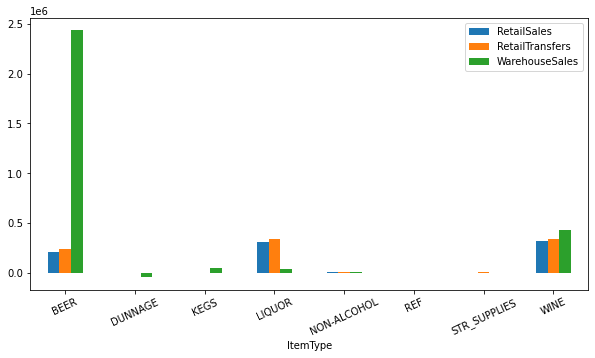

In [3]:
df = data.groupby('ItemType').agg({'RetailSales': sum, 'RetailTransfers': sum, 'WarehouseSales':sum})

display(df)

df.plot(kind = 'bar', figsize=(10,5), rot = (25));

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [4]:
# Construccion de la tabla para obtener el grafico
# Se hace la agregacion de las 3 columnas por Supplier
df = data.groupby('Supplier').agg({'RetailSales': sum, 'RetailTransfers': sum, 'WarehouseSales':sum})

#resetear indice
df.reset_index(inplace=True)

# Obtenemos la columna total_sales
df['total_sales'] = df['RetailSales'] + df['RetailTransfers'] + df['WarehouseSales']

# Ordenamos con respecto a las ventas totales en orden descendente
df.sort_values(by=['total_sales'], ascending = False, inplace = True)

In [5]:
df.head(10)

,Supplier,RetailSales,RetailTransfers,WarehouseSales,total_sales
184,MILLER BREWING COMPANY,35022.63,39176.67,572623.41,646822.71
69,CROWN IMPORTS,26707.83,29561.67,579824.70,636094.20
15,ANHEUSER BUSCH INC,42559.14,47322.64,493856.19,583737.97
139,HEINEKEN USA,20923.17,23004.25,318812.59,362740.01
94,E & J GALLO WINERY,67455.63,75129.83,75594.99,218180.45
78,DIAGEO NORTH AMERICA INC,57656.36,62968.12,54252.88,174877.36
65,CONSTELLATION BRANDS,54472.51,60542.10,44968.76,159983.37
150,JIM BEAM BRANDS CO,39156.79,43020.59,2928.45,85105.83
288,THE WINE GROUP,25758.15,28462.05,26603.78,80823.98
38,BOSTON BEER CORPORATION,10773.25,11869.96,53420.91,76064.12


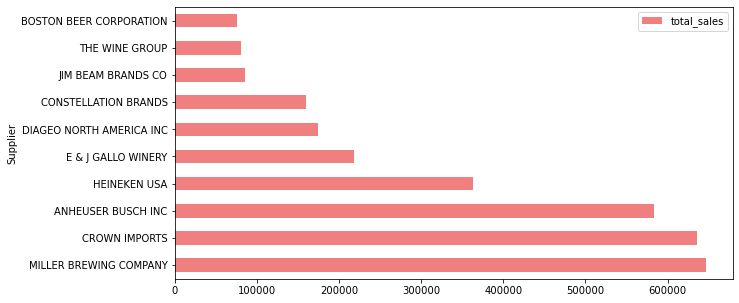

In [6]:
# Realizamos el primer gráfico
df.head(10).plot( x='Supplier', y='total_sales', 
                 kind = 'barh', 
                 figsize=(10,5), 
                 color = 'lightcoral');

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [7]:
# Construccion de la tabla
df = data.groupby(['Year', 'Month'])[['RetailSales', 'RetailTransfers', 'WarehouseSales']].agg(np.mean)
df

RetailSales  RetailTransfers  WarehouseSales
Year Month                                              
2017 4         0.000000        15.707503        0.000000
     5         7.038838         7.421817       27.310548
     6         7.143914         6.950396       27.839069
     8         6.409991         6.584726       28.122641
     9         6.757254         6.419721       22.817909
     10        6.549021         6.827827       22.289367
     11        6.765496         7.103699       23.348862
     12        9.078241         8.353759       21.169463
2018 1         5.679413         5.574833       19.072137
     2         5.939247         6.050136       20.229658

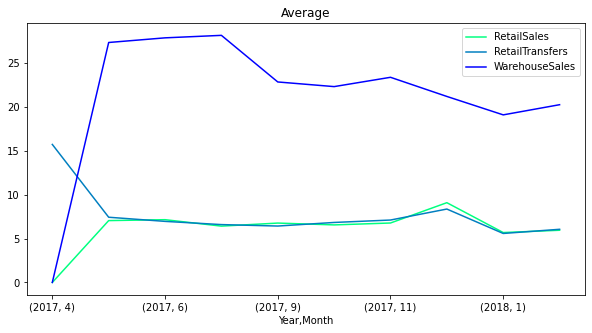

In [8]:
# Grafico
df.plot(kind='line', figsize=(10,5), title='Average', colormap ='winter_r');

## 4. Plot the same information as above but as a bar chart.

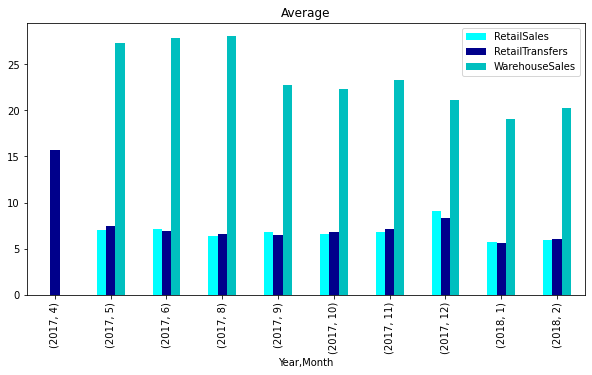

In [9]:
df.plot(kind='bar', figsize=(10,5), title='Average', color=['aqua', 'darkblue', 'c']);

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

sum                                                         \
           RetailSales                                                          
ItemType          BEER DUNNAGE KEGS    LIQUOR NON-ALCOHOL    REF STR_SUPPLIES   
Year Month                                                                      
2017 4            0.00     0.0  0.0      0.00        0.00   0.00         0.00   
     5        25023.24     0.0  0.0  35123.36        0.00   0.00         0.00   
     6        27863.26     0.0  0.0  35035.31     1209.23  30.60        89.22   
     8        23030.13     0.0  0.0  32186.04     1091.28  19.54        77.34   
     9        23852.76     0.0  0.0  32532.32      997.11  38.88        94.64   
     10       22583.78     0.0  0.0  32491.59      945.63  22.82        84.38   
     11       23341.14     0.0  0.0  35524.77     1005.19  63.11       106.06   
     12       28822.16     0.0  0.0  49522.28     1316.44  41.21       439.64   
2018 1        16606.33     0.0  0.0  28579.87      732.25  23.66        56.94   
     2        18640.31     0.0  0.0  28852.31      812.84  41.52        47.76   

                      
                      
ItemType        WINE  
Year Month            
2017 4          0.00  
     5      34546.89  
     6      33129.64  
     8      30707.45  
     9      32936.89  
     10     33108.76  
     11     38275.92  
     12     51492.76  
2018 1      29792.72  
     2      29409.39

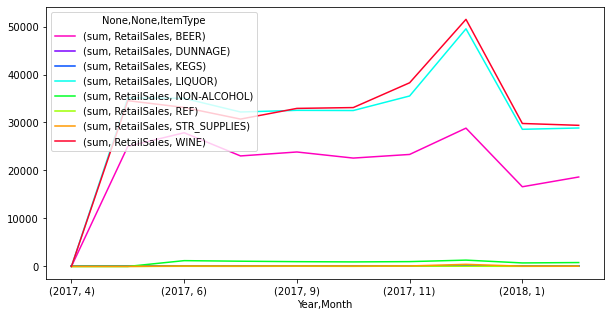

In [10]:
# Construccion de la tabla de los datos
df = pd.pivot_table(data, 
                    index = ['Year', 'Month', 'ItemType'], 
                    values = 'RetailSales', 
                    aggfunc = [sum], fill_value =0).unstack().fillna(0)
# Visualizar tabla
display(df)

# Realizar gráfico
df.plot(colormap='gist_rainbow_r', figsize = (10,5));

## 6. Plot the same information as above but as a bar chart.

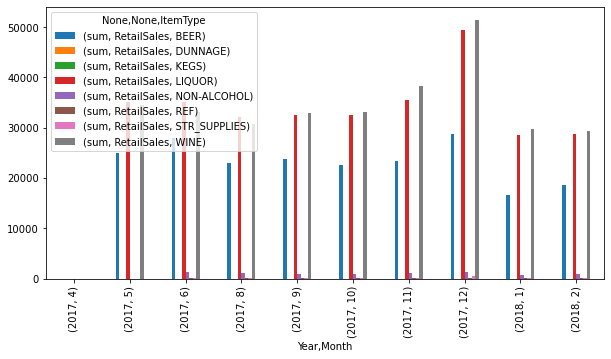

In [11]:
df.plot(kind='bar', figsize = (10,5));

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

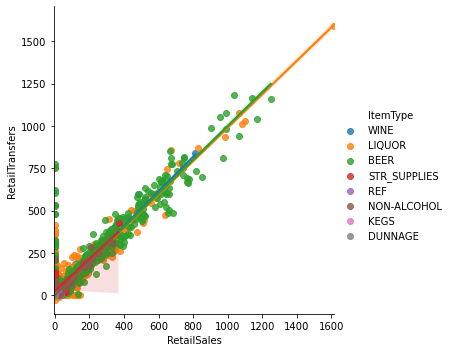

In [12]:
sns.lmplot(data=data, x="RetailSales", y="RetailTransfers", hue="ItemType");

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

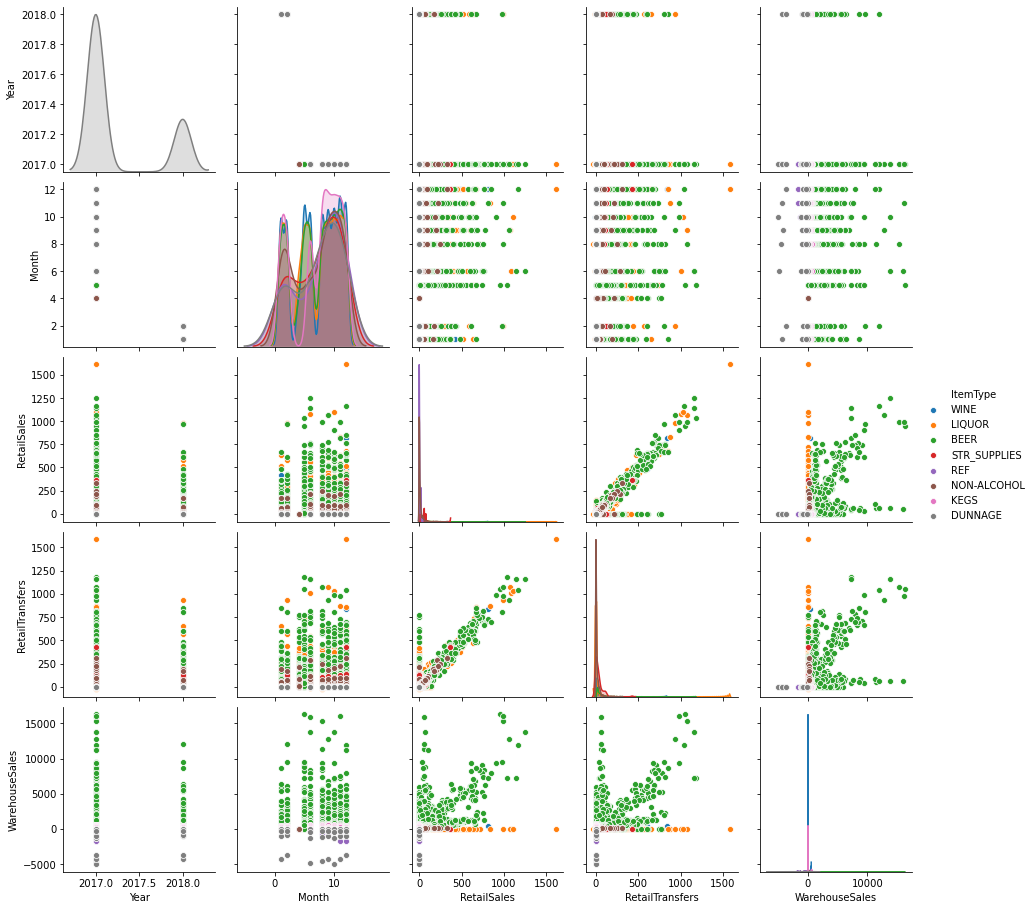

In [13]:
sns.pairplot(data, hue ='ItemType');